In [172]:
conda install pymongo

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [325]:
%reload_ext autoreload
%autoreload 2

In [3]:
from wine import Wine

wine = Wine()
wine.get_wine_data()
wine.create_df()

In [4]:
wine_df = wine.create_vintage_column()

In [5]:
wine_df = wine.create_grape_column()

In [323]:
type_df = wine.get_df_group_by_type()
# type_df = wine_df.groupby(['type']).agg({'ratings': 'mean', 'num_ratings': 'sum', 'price': 'mean'}).reset_index()
# type_df.sort_values(by=['price'], ascending=False)

In [9]:
wine.fill_null_value('price')

In [10]:
wine.fill_null_value('vintage')

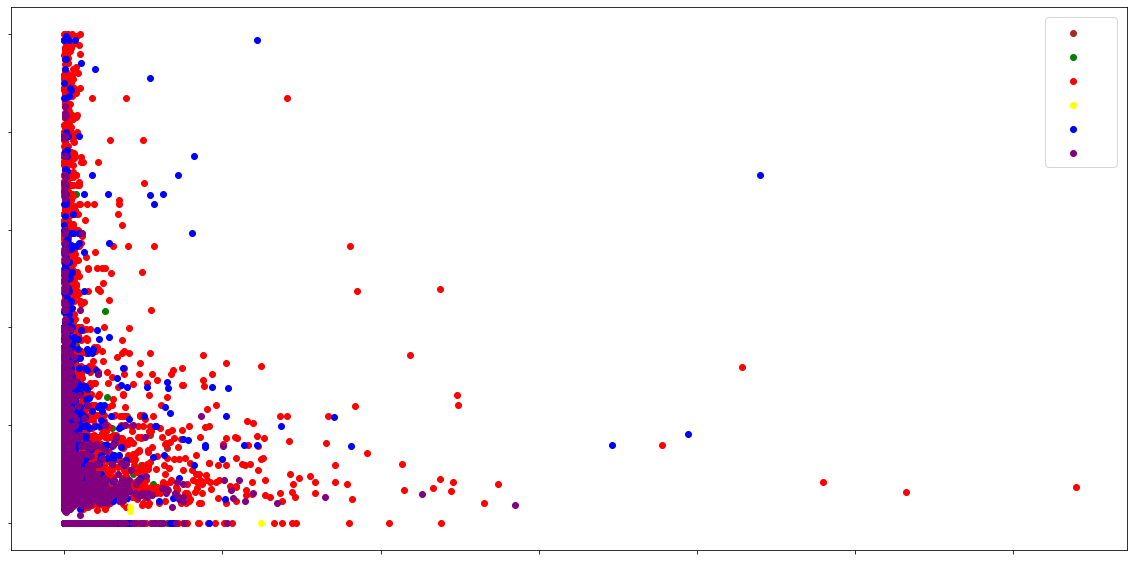

In [326]:
wine.plot_num_ratings_price(type_df)
# import matplotlib.pyplot as plt
# unique_type = type_df['type'].unique()
# color = ['brown', 'green', 'red', 'yellow', 'blue', 'purple']
# fig, ax = plt.subplots(figsize=[20,10])

# for idx, ty in enumerate(unique_type):
#     uniq_type_df = wine_df[wine_df['type'] == ty]
#     ax.scatter(uniq_type_df['num_ratings'], uniq_type_df['price'], label=ty, color=color[idx])
# plt.legend(fontsize=20)

# ax.set_title('Num Ratings vs Price', fontsize=20, pad=20)
# ax.set_xlabel('Num Ratings', fontsize=20)
# ax.set_ylabel('Price', fontsize=20)

# plt.savefig('images/num_ratings_price.png', bbox_inches = "tight")

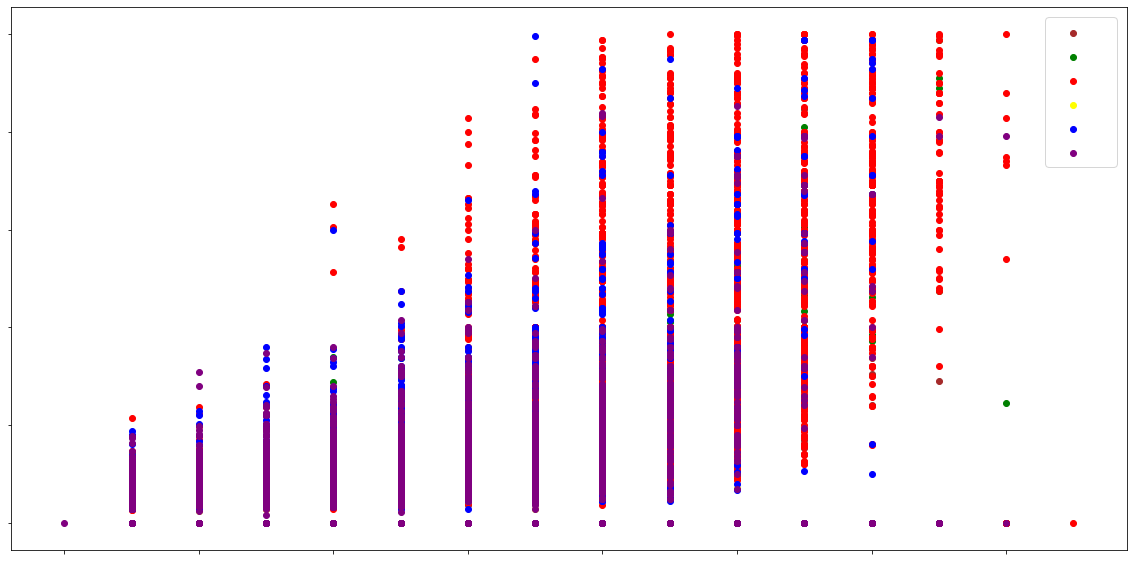

In [321]:
fig, ax = plt.subplots(figsize=[20,10])
unique_type = type_df['type'].unique()
color = ['brown', 'green', 'red', 'yellow', 'blue', 'purple']

for idx, ty in enumerate(unique_type):
    uniq_ratings_df = wine_df[wine_df['type'] == ty]
    ax.scatter(uniq_ratings_df['ratings'], uniq_ratings_df['price'], label=ty, color=color[idx])

plt.legend(fontsize=20)

ax.set_title('Ratings vs Price', fontsize=20, pad=20)
ax.set_xlabel('Ratings', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
plt.show()

# plt.savefig('images/ratings_price.png', bbox_inches = "tight")

In [29]:
count_type_df = wine_df.groupby('type').agg({'id': 'count'}).reset_index()
count_type_df.sort_values(by=['id'], ascending=False, inplace=True)
count_type_df

,type,id
2,Red,43507
5,White,14233
4,Sparkling,4317
1,Port,1292
3,Rosé,1089
0,Dessert,975


In [157]:
vintage_df = wine_df[(wine_df['vintage'] >= 1990.0) & (wine_df['price'] > 0.0)]
vintage_df_group = vintage_df.groupby(['vintage', 'type']).agg({'price': 'mean', 'num_ratings': 'sum'}).reset_index()
vintage_df_group

,vintage,type,price,num_ratings
0,1990.0,Dessert,175.000000,110
1,1990.0,Sparkling,173.040000,181
2,1991.0,Red,79.990000,189
3,1992.0,Port,98.860000,39
4,1993.0,Red,99.000000,65
...,...,...,...,...
113,2018.0,White,19.261799,210915
114,2019.0,Red,13.173333,536
115,2019.0,Rosé,11.330000,109
116,2019.0,Sparkling,13.980000,101


In [158]:
# index = vintage, columns = type, values = price
import pandas as pd
unique_vintage = vintage_df_group['vintage'].unique()

ind_types = {}
for types in unique_type:
    tyg = vintage_df_group[vintage_df_group['type'] == types]
    tyg[['vintage', 'price']]

    li = []
    for idx, yr in enumerate(unique_vintage.tolist()):
        if any(tyg['vintage'] == yr):
            li.append(tyg[tyg['vintage'] == yr]['price'].values[0])
        else:
            li.append(0)
    
    ind_types[types] = li

vintage_type = pd.DataFrame(ind_types, index=unique_vintage.tolist())
vintage_type

,Dessert,Port,Red,Rosé,Sparkling,White
1990.0,175.000000,0.000000,0.000000,0.000000,173.040000,0.000000
1991.0,0.000000,0.000000,79.990000,0.000000,0.000000,0.000000
1992.0,0.000000,98.860000,0.000000,0.000000,0.000000,0.000000
1993.0,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
1994.0,0.000000,142.817778,170.627500,0.000000,0.000000,0.000000
1995.0,0.000000,62.250000,155.825000,0.000000,169.990000,0.000000
1996.0,0.000000,59.240000,186.813333,0.000000,0.000000,110.740000
1997.0,0.000000,72.168333,122.500000,0.000000,0.000000,213.570000
1998.0,80.490000,63.270000,141.183333,0.000000,0.000000,86.020000
1999.0,0.000000,45.480000,150.445833,0.000000,0.000000,0.000000


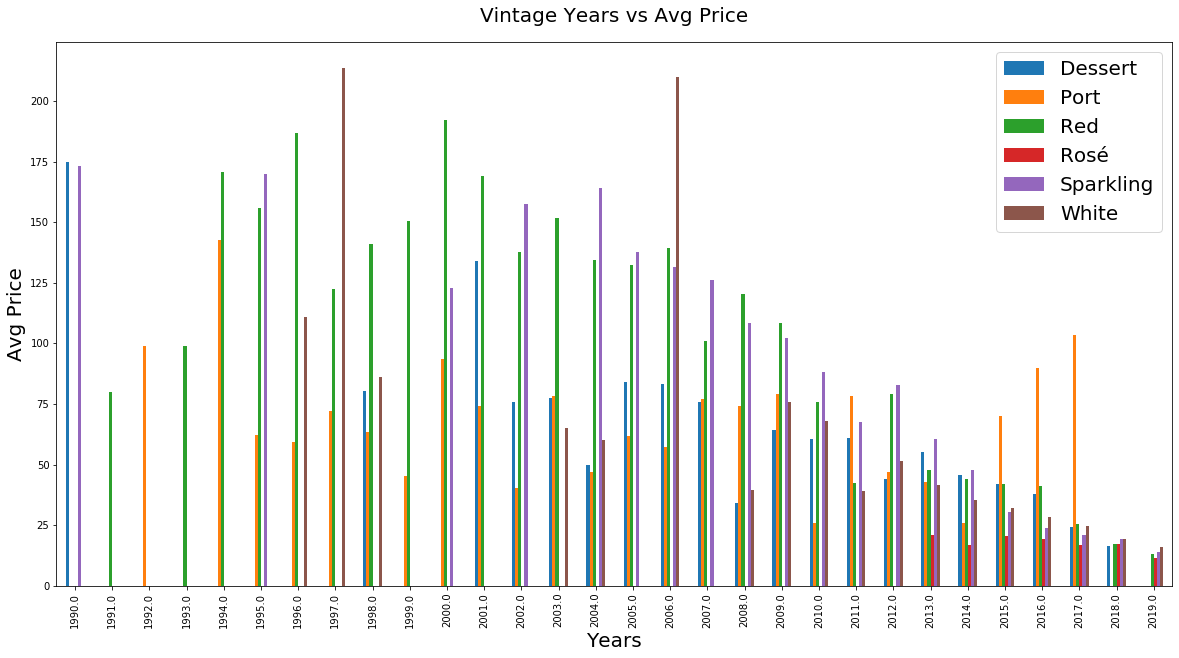

In [159]:
ax = vintage_type.plot.bar(figsize=[20, 10])
    
plt.legend(fontsize=20)

ax.set_title('Vintage Years vs Avg Price', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Avg Price', fontsize=20)

fig.savefig('images/vintage_price_bar.png', bbox_inches = "tight")

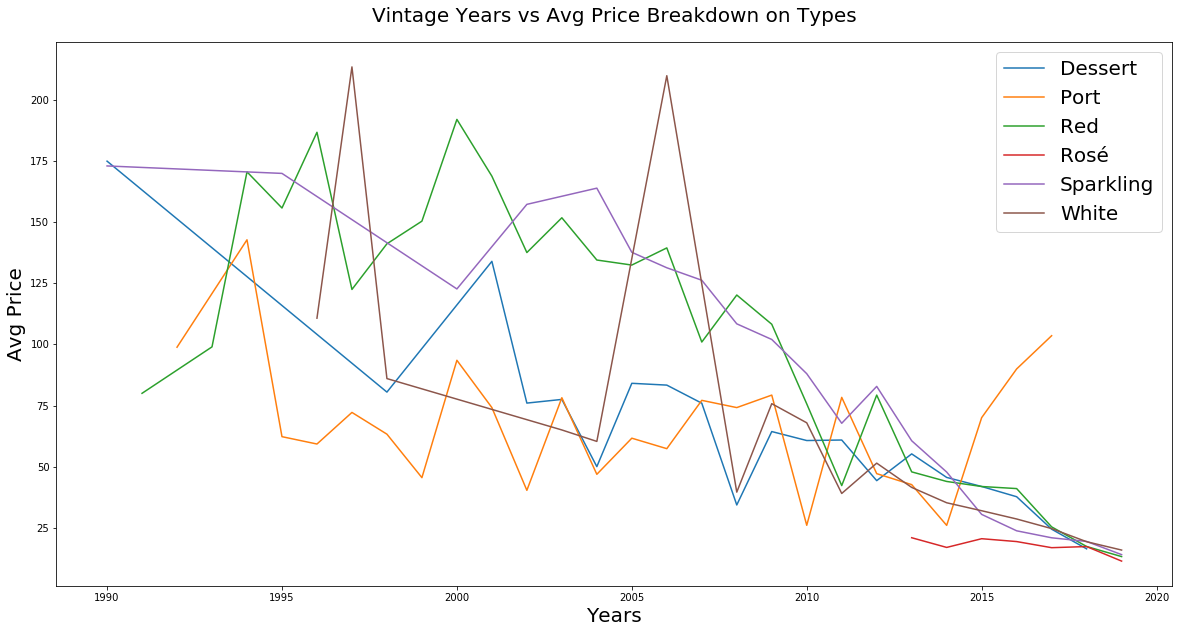

In [170]:
fig, ax = plt.subplots(figsize=[20, 10])

for idx, ty in enumerate(unique_type):
    tg = vintage_df_group[vintage_df_group['type'] == ty]
    ax.plot(tg['vintage'], tg['price'], label=ty)

ax.set_title('Vintage Years vs Avg Price Breakdown on Types', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Avg Price', fontsize=20)
plt.legend(fontsize=20)
fig.savefig('images/vintage_price_plot_types.png', bbox_inches = "tight")
# rw = ['Red', 'White']

# for idx, r in enumerate(rw):
#     tg = vintage_df_group[vintage_df_group['type'] == r]
#     ax.bar(tg['vintage'] + 0.2*idx, tg['price'], label=r, width=0.2)

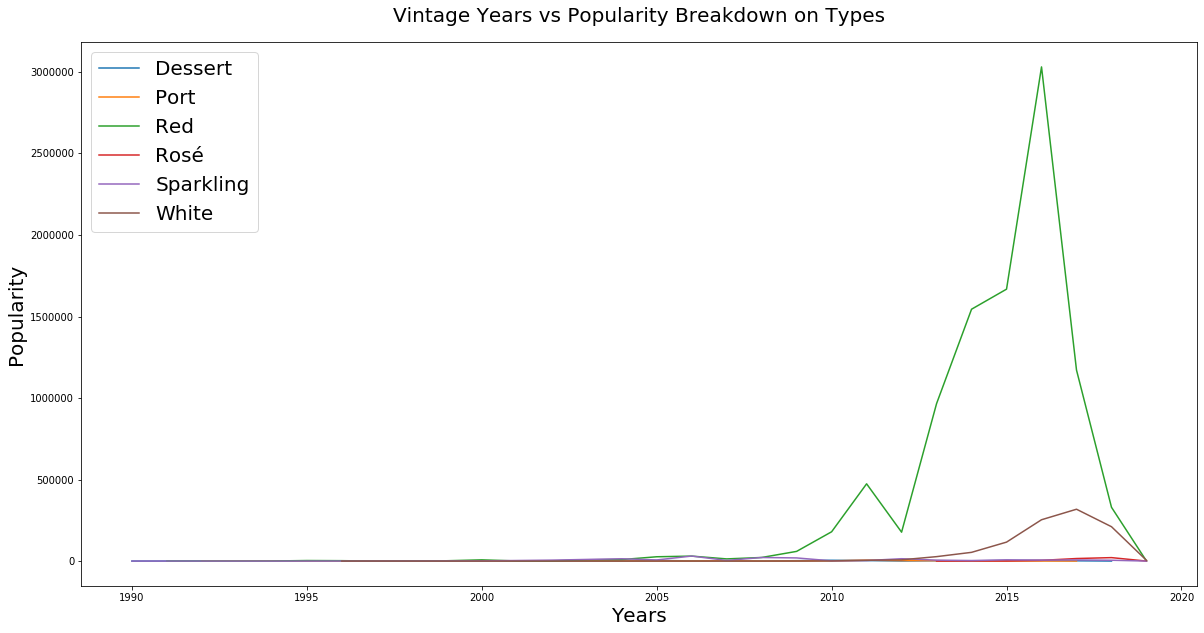

In [267]:
fig, ax = plt.subplots(figsize=[20, 10])

for idx, ty in enumerate(unique_type):
    tg = vintage_df_group[vintage_df_group['type'] == ty]
    ax.plot(tg['vintage'], tg['num_ratings'], label=ty)

ax.set_title('Vintage Years vs Popularity Breakdown on Types', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Popularity', fontsize=20)
plt.legend(fontsize=20)
fig.savefig('images/vintage_popularity_plot_types.png', bbox_inches = "tight")

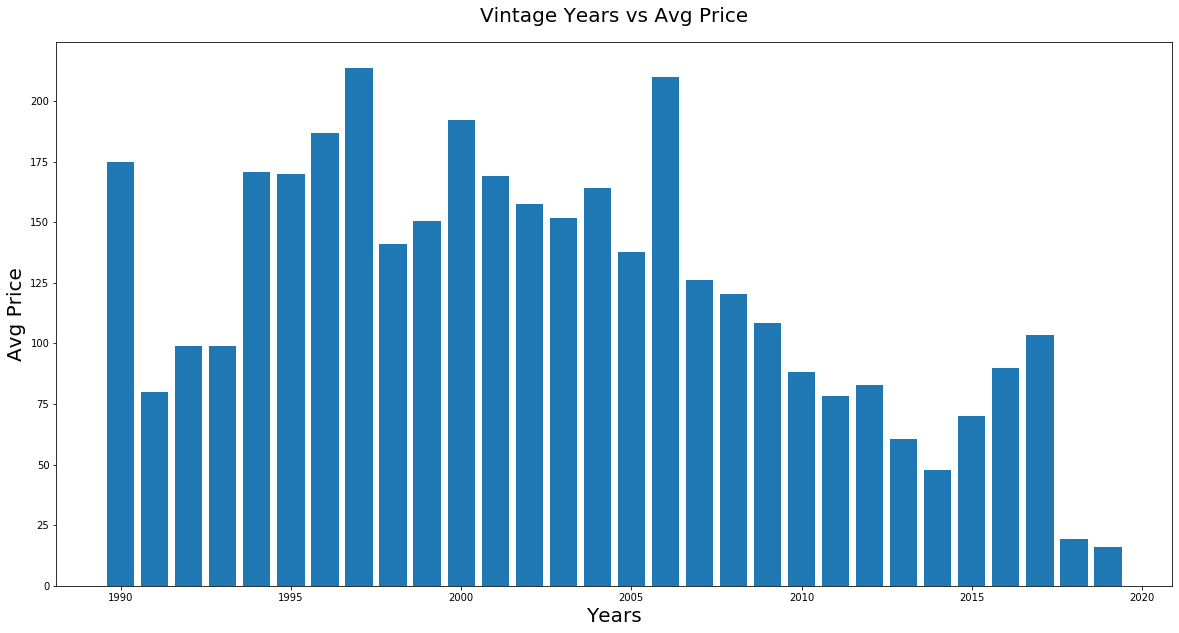

In [168]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(vintage_df_group['vintage'], vintage_df_group['price'])
ax.set_title('Vintage Years vs Avg Price', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Avg Price', fontsize=20)

fig.savefig('images/vintage_avg_price.png', bbox_inches = "tight")

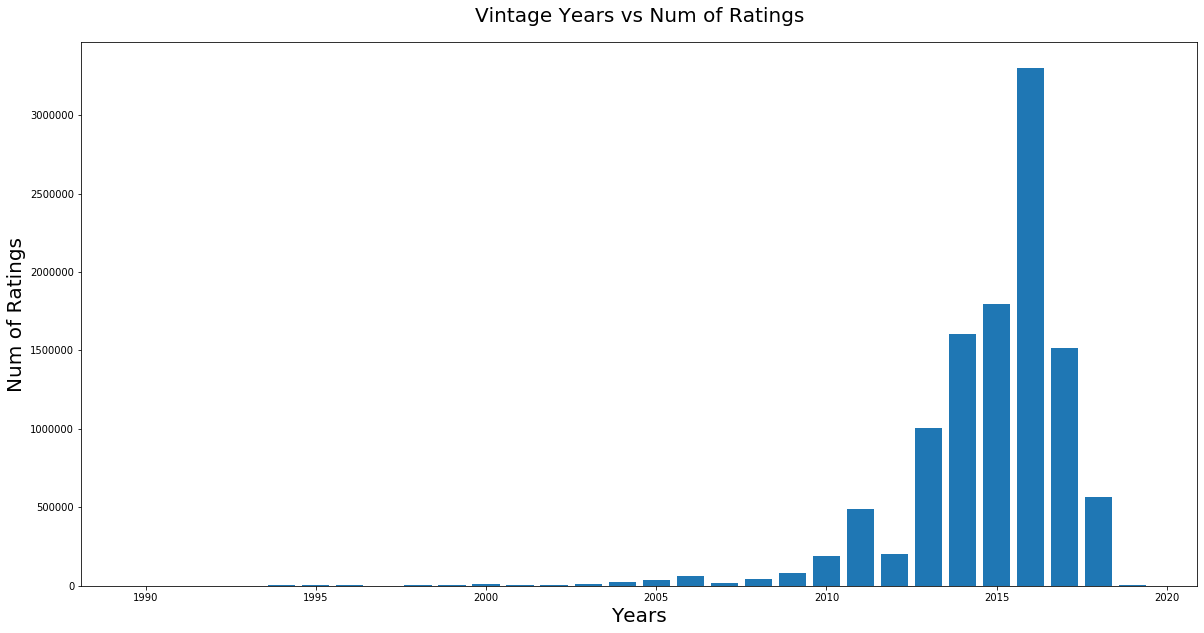

In [50]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(vintage_df_group['vintage'], vintage_df_group['num_ratings'])
ax.set_title('Vintage Years vs Num of Ratings', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Num of Ratings', fontsize=20)

fig.savefig('images/vintage_num_ratings.png')

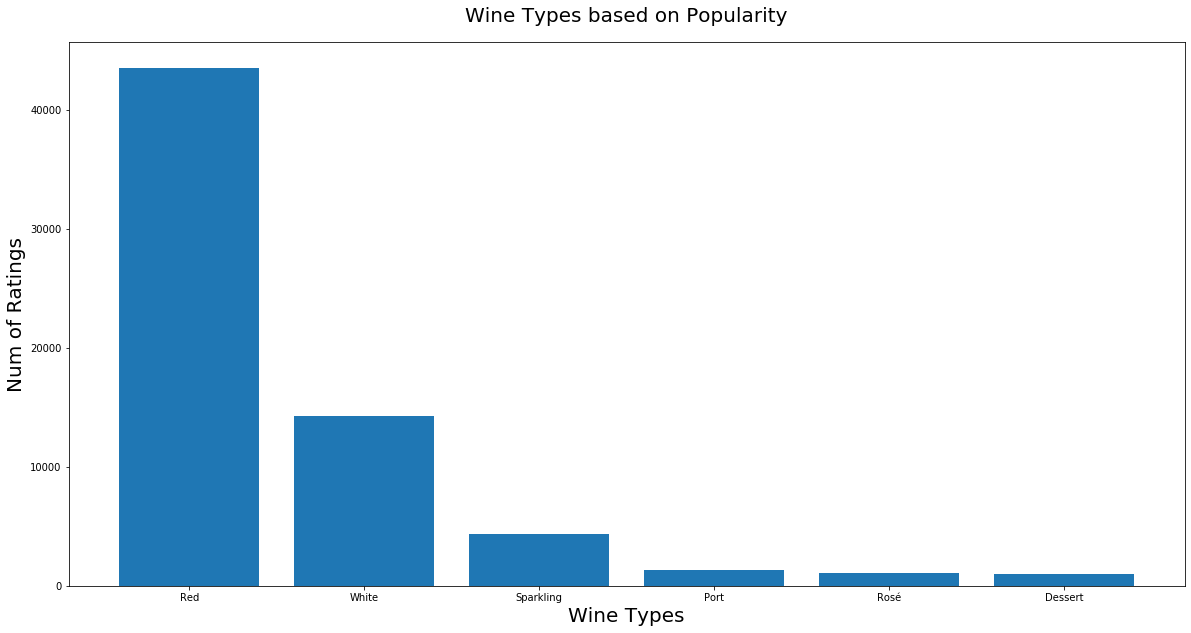

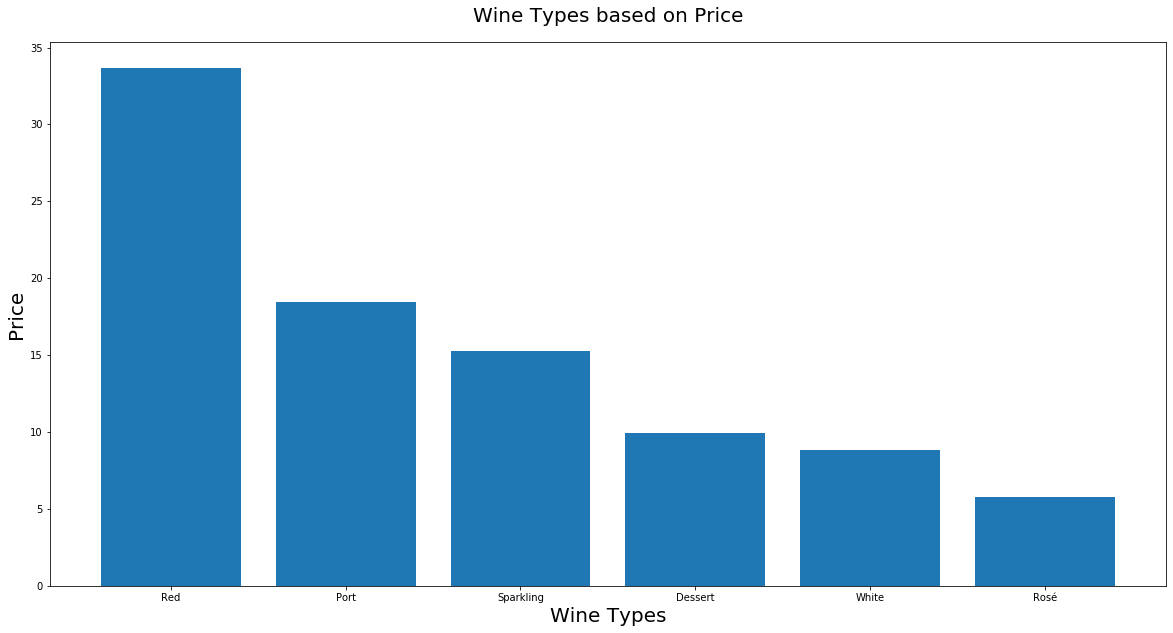

In [17]:
wine.plot_type_based_on_popularity()

In [ ]:
wine.country_rating_plot()

In [ ]:
us_df = wine.get_us_wines()

In [ ]:
wine.plot_us_type_wine(us_df)

In [ ]:
wine.plot_red_white_us_wine(us_df)

In [ ]:
stop

In [177]:
type_dummies = wine.get_dummies('type').dummies
country_dummies = wine.get_dummies('country').dummies
grape_dummies = wine.get_dummies('grapes').dummies

In [178]:
final_dummy = wine.combine_dummies(type_dummies, country_dummies, grape_dummies)

,id,title,country,price,type,ratings,num_ratings,vintage,grapes,Dessert,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
0,5e34c6e0ac2e8d38fb91773e,J. Schram Brut 2008,United States,99.00,Sparkling,4.5,191,2008.0,None,0,...,1,0,0,0,0,0,0,0,0,0
1,5e34c6e0ac2e8d38fb91773f,Carneros Cuvée 2005,United States,95.99,Sparkling,4.5,66,2005.0,None,0,...,1,0,0,0,0,0,0,0,0,0
2,5e34c6e0ac2e8d38fb917740,Carneros Cuvée 2004,United States,69.99,Sparkling,4.4,86,2004.0,None,0,...,1,0,0,0,0,0,0,0,0,0
3,5e34c6e0ac2e8d38fb917741,Brut Cuvée 2013,United States,58.99,Sparkling,4.4,31,2013.0,None,0,...,1,0,0,0,0,0,0,0,0,0
4,5e34c6e0ac2e8d38fb917742,Sea Spray Blanc de Noirs 2011,United States,89.99,Sparkling,4.3,99,2011.0,None,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,5e36df9d02148f7129b7687c,Poggio Al Tufo Rompicollo 2016,Italy,14.82,Red,3.9,479,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65409,5e36df9d02148f7129b7687d,Rosso di Montalcino 2016,Italy,24.71,Red,3.9,481,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65410,5e36df9d02148f7129b7687e,Torroja 2016,Spain,49.44,Red,3.9,495,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0
65411,5e36df9d02148f7129b7687f,Chianti Classico 2016,Italy,24.71,Red,3.9,503,2016.0,None,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# train_data = final_dummy[(final_dummy['price'] > 0.0) & (final_dummy['vintage'] > 0.0)]
# X = train_data.drop(columns=['price', 'type', 'grapes', 'id', 'title', 'country'])
# y = train_data['price']

X, y = wine.get_train_data(final_dummy)

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
0,4.5,191,2008.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4.5,66,2005.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4.4,86,2004.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.4,31,2013.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4.3,99,2011.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,3.9,479,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65409,3.9,481,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65410,3.9,495,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65411,3.9,503,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# X_train

X_train, X_test, y_train, y_test = wine.split_data(X, y)

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
45911,4.0,129,2016.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7876,4.5,122,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11558,4.3,38,2015.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55876,3.9,479,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62028,3.9,437,2015.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,4.1,87,2011.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14663,4.1,87,2017.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
20118,4.1,87,2014.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1888,3.9,38,2018.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib
import matplotlib.pyplot as plt

X_lr = X_train[['vintage', 'ratings']]
X_lr2 = train_data['ratings'] + train_data['vintage']

simple_model = sm.OLS(y_train, X_lr)
simple_results = simple_model.fit()
simple_results.summary()

In [ ]:
simple_results.params[0]

In [ ]:
# Equation: price = -0.188736 * vintage + 105.074*ratings

y_lr_pred = []
vin_beta = simple_results.params[0]
ratings_beta = simple_results.params[1]

for idx, row in X_test.iterrows():
    res = vin_beta * row['vintage'] + ratings_beta * row['ratings']
    y_lr_pred.append(res)

In [ ]:
calculate_rmse_grad_boost(y_test, y_lr_pred)

In [173]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,ratings,num_ratings,vintage,Dessert,Port,Red,Rosé,Sparkling,White,Argentina,...,United States,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Pinot Noir,Riesling,Sauvignon Blanc,Shiraz,Syrah
29493,3.9,1491,2016.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
58419,3.9,439,2016.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22224,4.1,89,2010.0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
25436,4.1,99,2015.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57249,3.9,477,2018.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,4.1,87,2011.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14663,4.1,87,2017.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
20118,4.1,87,2014.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1888,3.9,38,2018.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [197]:
def calculate_rmse(y):
    mean = y.mean()
    count = 0
    
    for ele in y:
        count += (ele - mean)**2
    
    return (count/len(y))**(1/2)

calculate_rmse(y_test)

31.47090855966222

In [259]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [297]:
model = RandomForestRegressor()

# estimators_param = np.arange(100, 2000, 100)
estimators_param = [1000, 2000]
depth_parm = [30]
parameters = {'n_estimators' : estimators_param,
             'max_depth': depth_parm}

clf = GridSearchCV(model,
                   parameters,
                   cv=10, 
                   verbose=1)
clf.fit(X_train, list(y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 16.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [30], 'n_estimato

In [298]:
y_clf_pred = clf.predict(X_test)
calculate_rmse_grad_boost(y_test, y_clf_pred)

14.029310238777432

In [ ]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [ ]:
from sklearn.metrics import r2_score
from collections import defaultdict

from sklearn.model_selection import ShuffleSplit

rf = RandomForestRegressor()
scores = defaultdict(list)

columns = X.columns
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rf.fit(X_train, y_train)
    acc = r2_score(y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rf.predict(X_t))
        scores[columns[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh')

In [ ]:
y_thresh = train_data['price'].apply(lambda x: 0 if x <= 125 else 1)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'calculate_threshold_values' is not defined

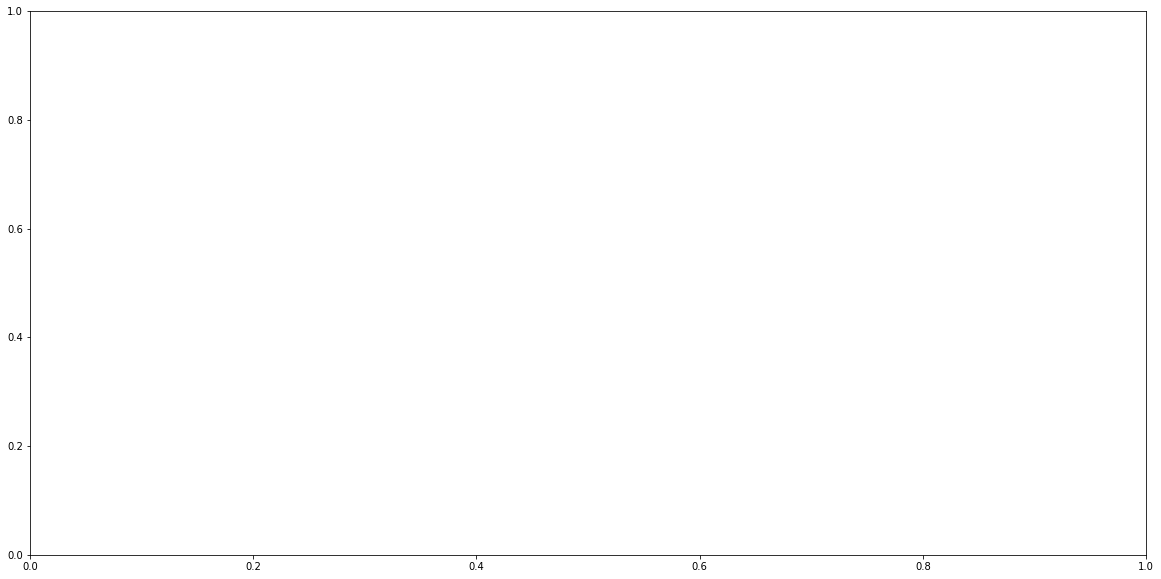

In [277]:
from sklearn.linear_model import LogisticRegression, LinearRegression

fig, ax = plt.subplots(figsize=(20,10))
df_roc = []

thresh = [25, 50, 75, 100, 125, 150]
# plot_roc(ax, df)
def get_roc(thresh):
    for t in thresh:
        model = LogisticRegression(C=1000)
        y_thresh = train_data['price'].apply(lambda x: 0 if x <= t else 1)
        model.fit(X, y_thresh)
        df_roc.append(calculate_threshold_values(model.predict_proba(X)[:,1], y_thresh))
        
    return df_roc

def plot_roc_curve(df_roc):
    for idx, df in enumerate(df_roc):
        plot_roc(ax, df, label="Threshold {}".format(thresh[idx]))
    ax.plot([0,1],[0,1], 'k', label="random")

df_roc = get_roc(thresh)
plot_roc_curve(df_roc)


In [ ]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, label='ROC'):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label=label)
#     ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=20)
    ax.set_ylabel('tpr', fontsize=20)
    ax.set_title('ROC Curve', fontsize=20, pad=20)
    ax.legend(fontsize=20)
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
df = calculate_threshold_values(model.predict_proba(X)[:,1], y_thresh)
plot_roc(ax, df)
# plot_precision_recall(ax1, df)

In [269]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)

In [271]:
N_ESTIMATORS = 500 # used later in model fitting
# Fit a gradient boosted regressor to this function 
#     and plot both the functiona and f
model = GradientBoostingRegressor(learning_rate=0.2, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [299]:
# N_ESTIMATORS = 500 # used later in model fitting
# Fit a gradient boosted regressor to this function 
#     and plot both the functiona and f
estimators = range(100, 1000, 10)

rmse_est = {}
for est in estimators:
    model = GradientBoostingRegressor(learning_rate=0.1, 
                                      n_estimators=est, #boosting stages to perform
                                      max_depth=3)
    model.fit(X_train, y_train)
    y_grad_boost_pred = clf.predict(X_test)
    rmse_est[est] = calculate_rmse_grad_boost(y_test, y_grad_pred)

rmse_est

{100: 12.901539980680266,
 110: 12.901539980680266,
 120: 12.901539980680266,
 130: 12.901539980680266,
 140: 12.901539980680266,
 150: 12.901539980680266,
 160: 12.901539980680266,
 170: 12.901539980680266,
 180: 12.901539980680266,
 190: 12.901539980680266,
 200: 12.901539980680266,
 210: 12.901539980680266,
 220: 12.901539980680266,
 230: 12.901539980680266,
 240: 12.901539980680266,
 250: 12.901539980680266,
 260: 12.901539980680266,
 270: 12.901539980680266,
 280: 12.901539980680266,
 290: 12.901539980680266,
 300: 12.901539980680266,
 310: 12.901539980680266,
 320: 12.901539980680266,
 330: 12.901539980680266,
 340: 12.901539980680266,
 350: 12.901539980680266,
 360: 12.901539980680266,
 370: 12.901539980680266,
 380: 12.901539980680266,
 390: 12.901539980680266,
 400: 12.901539980680266,
 410: 12.901539980680266,
 420: 12.901539980680266,
 430: 12.901539980680266,
 440: 12.901539980680266,
 450: 12.901539980680266,
 460: 12.901539980680266,
 470: 12.901539980680266,
 480: 12.901

In [295]:
model = GradientBoostingRegressor()

# estimators_param = np.arange(100, 2000, 100)
lr_param = [0.1]
est_param = [500, 1000]
depth_parm = [3, 5]
parameters = {'learning_rate' : lr_param,
              'n_estimators' : est_param,
             'max_depth': depth_parm}

clf = GridSearchCV(model,
                   parameters,
                   cv=10, 
                   verbose=1)
clf.fit(X_train, list(y_train))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [296]:
y_grad_pred = clf.predict(X_test)
calculate_rmse_grad_boost(y_test, y_grad_pred)

12.901539980680266

In [199]:
def calculate_rmse_grad_boost(y_test, y_pred):
    count = 0

    for idx, ele in enumerate(y_test):
        count += (ele - y_pred[idx])**2

    return (count/len(y_test))**(1/2)

In [ ]:
fig, ax = plt.subplots(figsize=[20, 10])

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
rmse = []
for lr in learning_rates:
    model = GradientBoostingRegressor(learning_rate=lr, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse.append(calculate_rmse_grad_boost(y_test, y_pred))
ax.plot(learning_rates, rmse)
ax.set_title('Gradient Boosting', fontsize=20, pad=20)
ax.set_xlabel('Learning Rate', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)

In [ ]:
rmse

In [272]:
N_ESTIMATORS = 500 # used later in model fitting
# Fit a gradient boosted regressor to this function 
#     and plot both the functiona and f
clf = GradientBoostingRegressor(learning_rate=0.1, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [273]:
y_pred = clf.predict(X_test)

In [274]:
calculate_rmse_grad_boost(y_test, y_pred)

13.124160124743694

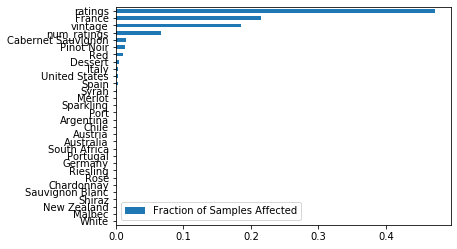

In [275]:
feat_scores_xgboost = pd.DataFrame({'Fraction of Samples Affected' : clf.feature_importances_},
                           index=X.columns)
feat_scores_xgboost = feat_scores_xgboost.sort_values(by='Fraction of Samples Affected')
feat_scores_xgboost.plot(kind='barh')

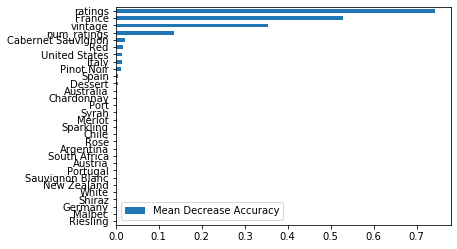

In [276]:
from sklearn.metrics import r2_score
from collections import defaultdict

from sklearn.model_selection import ShuffleSplit

clf = GradientBoostingRegressor(learning_rate=0.1, 
                                  n_estimators=N_ESTIMATORS, #boosting stages to perform
                                  max_depth=3)
scores = defaultdict(list)

columns = X.columns
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    clf.fit(X_train, y_train)
    acc = r2_score(y_test, clf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, clf.predict(X_t))
        scores[columns[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh')